In [1]:
# Import relevant libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import copy
import pandas as pd
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Function for producing differenced image at RGB color channels

def img_diff(orig_image, new_image):
    # Convert images to grayscale
    imageA = copy.deepcopy(orig_image)
    imageB = copy.deepcopy(new_image)
    grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Display image differences
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(imageA)
    axarr[0,1].imshow(imageB)
    axarr[1,0].imshow(diff)
    axarr[1,1].imshow(thresh)

    # Return the differenced threshold image
    return thresh

In [4]:
# Create function to crop center of image 
def crop_image_center(img, rows, cols):
    
    # Find starting coordinates of top left corner of center crop
    start_row = (img.shape[0] - rows) // 2
    start_col = (img.shape[1] - cols) // 2
    
    new_image = copy.deepcopy(img[start_row:start_row+rows, start_col:start_col+cols, :])
    
    return new_image

In [6]:
# Create function for HOG features

def get_hog(image_set, orient_count, pix_per_cell):
    
    # Initialize list for features and sample images
    feat_list = []
    total_img_count = len(image_set)
  
    # Iterate over images, get HOG features, then stack feature values together
    for z in range(total_img_count):
        orig_im = copy.deepcopy(image_set[z])
        fd, hog_image = hog(orig_im, orientations=orient_count,
                            pixels_per_cell=(pix_per_cell, pix_per_cell), 
                            cells_per_block=(2, 2), visualize=True, multichannel=False)
        feat_list.append(fd[np.newaxis, :])
        
    total_hog = np.vstack(feat_list)
        
    return total_hog

# Create function to calculate classification accuracy
def get_accuracy(predicted, actual):
    correct_count = 0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct_count += 1
    return float(correct_count) / len(predicted)

In [7]:
# Load images
img_names4 = ['Sinabung_2019-08-10_261080_22365_aVH.png',
              'Sinabung_2019-08-17_261080_22365_aVH.png','Sinabung_2019-08-24_261080_22365_aVH.png',
              'Sinabung_2019-08-31_261080_22365_aVH.png','Sinabung_2019-09-07_261080_22365_aVH.png',
              'Sinabung_2019-09-14_261080_22365_aVH.png','Sinabung_2019-09-21_261080_22365_aVH.png',
              'Sinabung_2019-09-28_261080_22365_aVH.png','Sinabung_2019-10-05_261080_22365_aVH.png',
              'Sinabung_2019-10-12_261080_22365_aVH.png','Sinabung_2019-10-19_261080_22365_aVH.png',
              'Sinabung_2020-08-08_261080_22365_aVH.png','Sinabung_2020-08-15_261080_22365_aVH.png',
              'Sinabung_2020-08-22_261080_22365_aVH.png','Sinabung_2020-08-29_261080_22365_aVH.png',
              'Sinabung_2020-09-05_261080_22365_aVH.png','Sinabung_2020-09-12_261080_22365_aVH.png',
              'Sinabung_2020-09-19_261080_22365_aVH.png','Sinabung_2020-09-26_261080_22365_aVH.png',
              'Sinabung_2020-10-03_261080_22365_aVH.png','Sinabung_2020-10-10_261080_22365_aVH.png',
              'Sinabung_2020-10-17_261080_22365_aVH.png']

img_list4 = []
for image in img_names4:
    new_img_string = 'sample_images/' + image
    new_img = plt.imread(new_img_string)
    img_list4.append(new_img)

In [8]:
# Find minimum rows and columns across images
r_list = []
c_list = []

for i in range(len(img_list4)):
    r_list.append(img_list4[i].shape[0])
    c_list.append(img_list4[i].shape[1])

min_rows = min(r_list)
min_cols = min(c_list)
print(min_rows)
print(min_cols)
print(max(r_list))
print(max(c_list))

846
867
846
867


In [9]:
# Crop images to get exact same dimensions across dataset
new_im0x = crop_image_center(img_list4[0], min_rows, min_cols)
new_im1x = crop_image_center(img_list4[1], min_rows, min_cols)
new_im2x = crop_image_center(img_list4[2], min_rows, min_cols)
new_im3x = crop_image_center(img_list4[3], min_rows, min_cols)
new_im4x = crop_image_center(img_list4[4], min_rows, min_cols)
new_im5x = crop_image_center(img_list4[5], min_rows, min_cols)
new_im6x = crop_image_center(img_list4[6], min_rows, min_cols)
new_im7x = crop_image_center(img_list4[7], min_rows, min_cols)
new_im8x = crop_image_center(img_list4[8], min_rows, min_cols)
new_im9x = crop_image_center(img_list4[9], min_rows, min_cols)
new_im10x = crop_image_center(img_list4[10], min_rows, min_cols)
new_im11x = crop_image_center(img_list4[11], min_rows, min_cols)
new_im12x = crop_image_center(img_list4[12], min_rows, min_cols)
new_im13x = crop_image_center(img_list4[13], min_rows, min_cols)
new_im14x = crop_image_center(img_list4[14], min_rows, min_cols)
new_im15x = crop_image_center(img_list4[15], min_rows, min_cols)
new_im16x = crop_image_center(img_list4[16], min_rows, min_cols)
new_im17x = crop_image_center(img_list4[17], min_rows, min_cols)
new_im18x = crop_image_center(img_list4[18], min_rows, min_cols)
new_im19x = crop_image_center(img_list4[19], min_rows, min_cols)
new_im20x = crop_image_center(img_list4[20], min_rows, min_cols)
new_im21x = crop_image_center(img_list4[21], min_rows, min_cols)

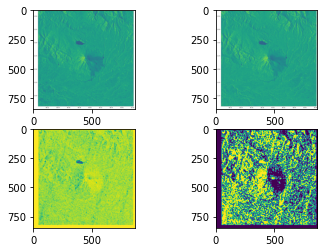

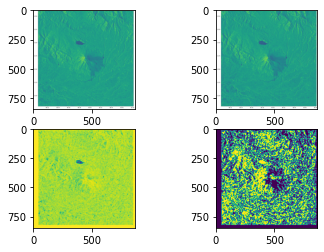

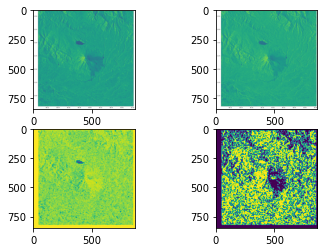

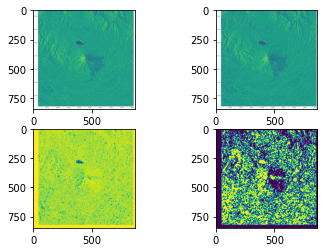

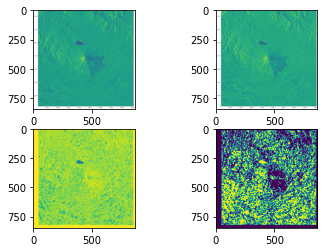

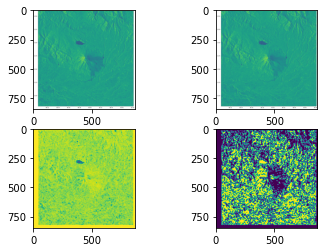

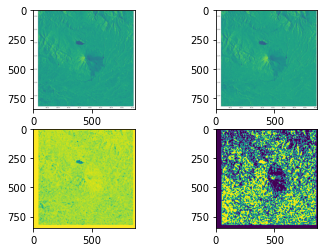

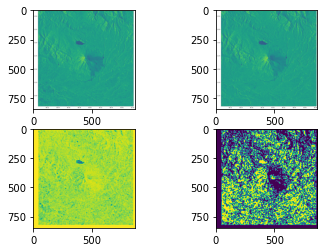

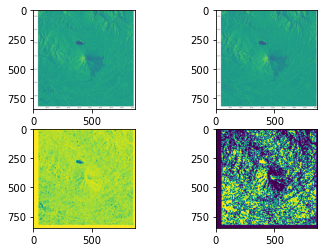

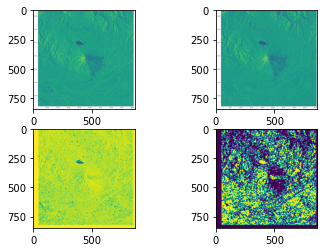

In [10]:
# Apply the image differencing function
diff_img1x = img_diff(new_im0x, new_im1x)
diff_img2x = img_diff(new_im0x, new_im2x)
diff_img3x = img_diff(new_im0x, new_im3x)
diff_img4x = img_diff(new_im0x, new_im4x)
diff_img5x = img_diff(new_im0x, new_im5x)
diff_img6x = img_diff(new_im0x, new_im6x)
diff_img7x = img_diff(new_im0x, new_im7x)
diff_img8x = img_diff(new_im0x, new_im8x)
diff_img9x = img_diff(new_im0x, new_im9x)
diff_img10x = img_diff(new_im0x, new_im10x)

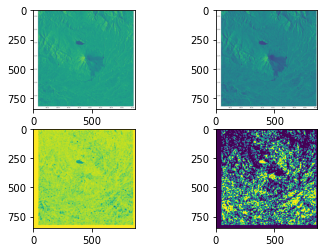

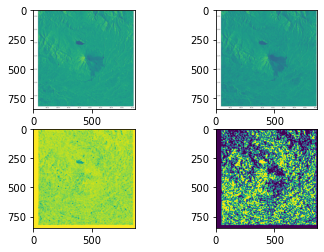

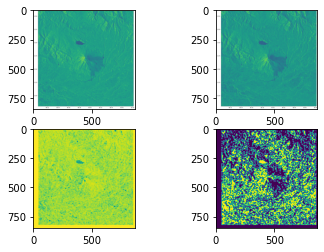

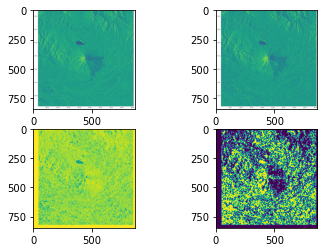

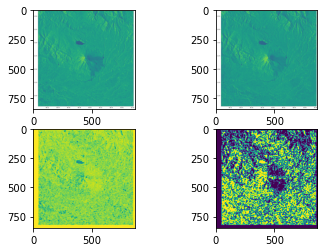

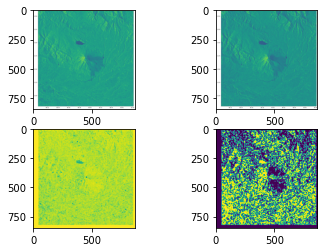

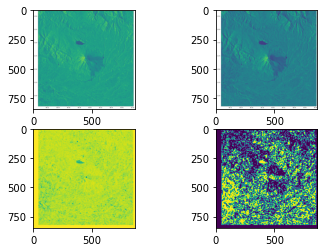

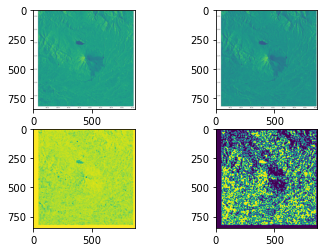

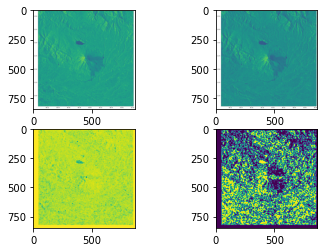

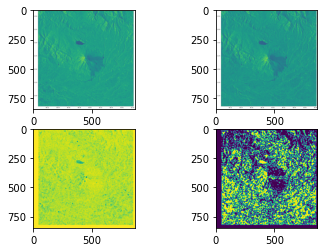

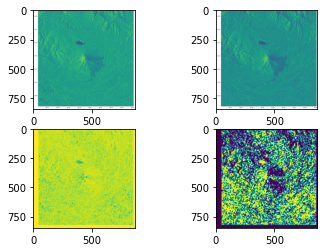

In [11]:
# Apply the image differencing function
diff_img11x = img_diff(new_im0x, new_im11x)
diff_img12x = img_diff(new_im0x, new_im12x)
diff_img13x = img_diff(new_im0x, new_im13x)
diff_img14x = img_diff(new_im0x, new_im14x)
diff_img15x = img_diff(new_im0x, new_im15x)
diff_img16x = img_diff(new_im0x, new_im16x)
diff_img17x = img_diff(new_im0x, new_im17x)
diff_img18x = img_diff(new_im0x, new_im18x)
diff_img19x = img_diff(new_im0x, new_im19x)
diff_img20x = img_diff(new_im0x, new_im20x)
diff_img21x = img_diff(new_im0x, new_im21x)

In [12]:
# Create image labels and list of differenced images
img_labels4 = [0,0,0,0,0,1,1,1,1,1,1,
               0,0,0,0,0,1,1,1,1,1]

diff_img_list4 = [diff_img1x, diff_img2x, diff_img3x, diff_img4x, diff_img5x,
                 diff_img11x, diff_img12x, diff_img13x, diff_img14x, diff_img15x, diff_img16x, 
                 diff_img6x, diff_img7x, diff_img8x, diff_img9x, diff_img10x, 
                 diff_img17x, diff_img18x, diff_img19x, diff_img20x, diff_img21x]

In [13]:
# Get HOG features using the best parameters previously found: 4 for orientations and 10 for pixels per cell
hog_feat4 = get_hog(diff_img_list4, 4, 10)

# Get top 8 features for HOG using PCA
pca_hog4 = PCA(n_components=8, svd_solver="randomized", random_state=7).fit(hog_feat4)
X_pca_hog4 = pca_hog4.transform(hog_feat4)

# Check dimensions of top 8 features for HOG after PCA
print(X_pca_hog4.shape)

(21, 8)


In [14]:
# Convert training set and test set labels and features to numpy arrays
y_train = np.array(img_labels4[:11])
y_test = np.array(img_labels4[11:])

X_train = X_pca_hog4[:11, :]
X_test = X_pca_hog4[11:, :]

# Normalize feature values using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Fit RF model
rf1 = RandomForestClassifier(max_depth=3).fit(X_train, y_train)

# Get predictions on training set and calculate classification accuracy
y_predict7 = rf1.predict(X_train)
print("RF model training set accuracy is: ")
print(get_accuracy(y_predict7, y_train))

# Get predictions on validation set and calculate classification accuracy
y_predict8 = rf1.predict(X_test)
print("RF model test set accuracy is: ")
print(get_accuracy(y_predict8, y_test))

# Print classification report
print(" ")
print("RF Model Classification Report")
print(classification_report(y_test, y_predict8))

print(" ")
print("Predicted:")
print(y_predict8)
print("Actual:")
print(y_test)

RF model training set accuracy is: 
1.0
RF model test set accuracy is: 
0.7
 
RF Model Classification Report
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10

 
Predicted:
[0 0 1 1 1 1 1 1 1 1]
Actual:
[0 0 0 0 0 1 1 1 1 1]


In [16]:
# Fit SVM model
svm1 = SVC(C=3, kernel='rbf').fit(X_train, y_train)

# Get predictions on training set and calculate classification accuracy
y_predict2 = svm1.predict(X_train)
print("SVM model training set accuracy is: ")
print(get_accuracy(y_predict2, y_train))

# Get predictions on validation set and calculate classification accuracy
y_predict3 = svm1.predict(X_test)
print("SVM model test set accuracy is: ")
print(get_accuracy(y_predict3, y_test))

# Print classification report
print(" ")
print("SVM Model Classification Report")
print(classification_report(y_test, y_predict3))

print(" ")
print("Predicted:")
print(y_predict3)
print("Actual:")
print(y_test)

SVM model training set accuracy is: 
1.0
SVM model test set accuracy is: 
0.8
 
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

 
Predicted:
[0 0 0 0 0 1 1 1 0 0]
Actual:
[0 0 0 0 0 1 1 1 1 1]


SSIM: 0.9262075964421916


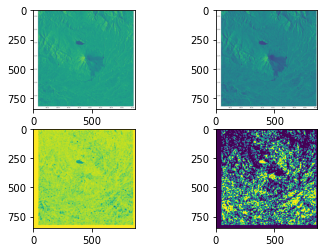

In [33]:
# Convert images to grayscale
imageA = copy.deepcopy(new_im0x)
imageB = copy.deepcopy(new_im11x)
grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Display image differences
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(diff)
axarr[1,1].imshow(thresh)

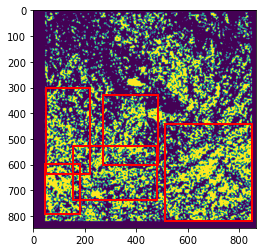

In [34]:
# Find contours of key areas of change
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=1000)[0]

# Create figure and axes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(thresh)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()